### Read File

In [51]:
file = open('../data/read_test.txt', 'r', encoding='UTF-8') # 파일 객체 생성

text = file.readline() # 파일 내의 텍스트를 줄(line) 단위로 읽는다. (한 줄씩)
                       # 처음으로 사용하면 첫 번째 줄을 읽고, 한 번 더 사용하면 두 번째 줄을 읽는다. (for문 사용)
print(text)

file.close()

가



In [52]:
file = open('../data/read_test.txt', 'r', encoding='UTF-8') # 파일 객체 생성

# 파일 내의 모든 텍스트를 리스트 형식으로 줄 단위로 읽는다.
text = file.readlines()
print(text)

file.close()

['가\n', '나\n', '다\n', 'abcdefghhiklmnopqrstuvwxyz\n', 'ABCDEFGHIJKLMNOPQRSTUVWXYZ\n', '판다스 머신러닝\n', '텍스트 파일 읽기 테스트']


In [53]:
file = open('../data/read_test.txt', 'r', encoding='UTF-8') # 파일 객체 생성

# 파일 내의 모든 텍스트를 하나의 문자열로 읽는다.
text = file.read()
print(text)

file.close()

가
나
다
abcdefghhiklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
판다스 머신러닝
텍스트 파일 읽기 테스트


('교육 차 서울 출장 시간 예약 체크아웃 핸드폰 충전기 곤란 프론트 데스크 대여 수 문의 사항 요청 사항 응대 객실 여유 요청 객실 '
 '업그레이드 아 점심 뷔페 예약 제로 진행 만석 이용 인원 제한 명단 작성 것 믿음 객실 다음 번 이용 생각 주변 추천 위치 룸 컨디션 '
 '생각 주차장 객실 주변 음식점 편의 시설 프론트 데스크 직원 문의 사항 요청 사항 친절 처리 박 강남 부근 숙박 호텔 가성 비 갑 방 '
 '필요 것 샤워 박스 욕조 타입 중 선택 객실 무 직원 서비스 친절 다음 방문 어메니티 아 베다 맘 문의 전화 친절 고객 요구 친절 응대 '
 '시간 침구 직원 친절 다음 방문 의사 프로 입 당 다 수 코로나 조심 서울 출장 때 데 위치 친절 조식 메뉴 추천 직원 친절 습 니다 '
 '역삼역 접근성 강남 삼성 이동 벨보이 인형 로비 인상 서울 강남 한복판 연식 군더더기 합 니다 어메니티 아베 다인 것 도심 위치 교통 '
 '주변 편의 시설 내부 전망 프론트 직원 친절 서울 출장 때 물론 편안 느낌 덕분 것 오늘 직원 친절 신라 스테이 처음 호텔 갈 일 거 '
 '다음 방문 방도 일회용품 위생 구비 다음 방문 할거 역삼 호텔 신라 스테이 서울 때 곳 직원 친절 침대 꿀 입구 안전 정도 체온 체크 '
 '신상 조사 룸 상태 비즈니스 호텔 이상인 거 정도 직원 친절 대응 가격 방 상태도 브랜드 신뢰도 위치 다음 이용 가격 대비 내부 직원 '
 '친절 곳 박 이용 룸 컨디션 시설 위치 만족 직원 분도 친절 가족 여행 추억 룸 컨디션 직원 무지 친절 감사 박 동안 교통 편리 직원 '
 '친절 청소 상태도 청결 어 매니 티 제공 제품 맘 박 동안 교통 편리 직원 친절 청소 상태도 청결 어 매니 티 제공 제품 맘 객실 호텔 '
 '시설 문 의전 상담 직원 친절 가격 적정 이용 생각 도착 직원 친절 얼 리 체크 안내 방 생각 것 다음 근처 출장 예정 편안 애용 곳 '
 '이예 요 이만 한 가격 이만 한 곳 최고 !! 도로 옆 약간 도시 소음 건물 시설 방 침대

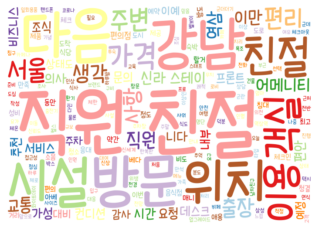

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

with open("../10월16일 day3/naverhotel.txt", "r", encoding="UTF-8") as f: # f라는 파일 객체 생성
    text = f.read()

# Komoran 형태소분석 클래스 사용 
from konlpy.tag import Komoran
from konlpy.utils import pprint
komoran = Komoran()

nouns = komoran.nouns(text) # Komoran 형태소 분석기로 명사 추출(List)
nouns = " ".join(nouns) # str 원소 여러개를 띄어쓰기를 구분으로하여 하나의 str 원소로 합침
pprint(nouns) # print보다 정렬되어 출력, 주로 json, xml같은 파일형식의 내용을 출력할 때 사용

# 한글은 별도의 집합으로 불용어를 만든다
stopwords = set() 
stopwords.add("호텔")

# 워드 클라우드 객체를 만든다
wordcloud = WordCloud(stopwords=stopwords,
                      font_path=font_path,
                      background_color='white',
                      colormap='Paired', # 폰트 color : PRGn, rainbow
                      width=700,
                      height=500)


# 빈도별로 워드클라우드를 만든다
wordcloud = wordcloud.generate_from_text(nouns)

# 워드클라우드 저장
wordcloud.to_file('wordcloud.png')

# 워드클라우드 출력
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

['교육', '차', '서울', '출장', '시간', '예약', '체크아웃', '핸드폰', '충전기', '곤란', '프론트', '데스크', '대여', '수', '문의', '사항', '요청', '사항', '응대', '객실', '여유', '요청', '객실', '업그레이드', '아', '점심', '뷔페', '예약', '제로', '진행', '만석', '이용', '인원', '제한', '명단', '작성', '것', '믿음', '객실', '다음', '번', '이용', '생각', '주변', '추천', '위치', '룸', '컨디션', '생각', '주차장', '객실', '주변', '음식점', '편의', '시설', '프론트', '데스크', '직원', '문의', '사항', '요청', '사항', '친절', '처리', '박', '강남', '부근', '숙박', '호텔', '가성', '비', '갑', '방', '필요', '것', '샤워', '박스', '욕조', '타입', '중', '선택', '객실', '무', '직원', '서비스', '친절', '다음', '방문', '어메니티', '아', '베다', '맘', '문의', '전화', '친절', '고객', '요구', '친절', '응대', '시간', '침구', '직원', '친절', '다음', '방문', '의사', '프로', '입', '당', '다', '수', '코로나', '조심', '서울', '출장', '때', '데', '위치', '친절', '조식', '메뉴', '추천', '직원', '친절', '습', '니다', '역삼역', '접근성', '강남', '삼성', '이동', '벨보이', '인형', '로비', '인상', '서울', '강남', '한복판', '연식', '군더더기', '합', '니다', '어메니티', '아베', '다인', '것', '도심', '위치', '교통', '주변', '편의', '시설', '내부', '전망', '프론트', '직원', '친절', '서울', '출장', '때', '물론', '편안', '느낌', '덕분', '것', '오늘', '직

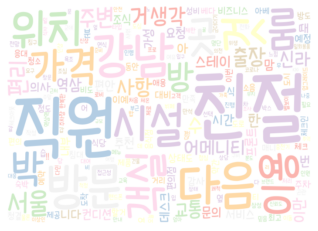

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

with open("../10월16일 day3/naverhotel.txt", "r", encoding="UTF-8") as f: # f라는 파일 객체 생성
    text = f.read()

# Komoran 형태소분석 클래스 사용 
from konlpy.tag import Komoran
from konlpy.utils import pprint
komoran = Komoran()    

nouns = komoran.nouns(text) # Komoran 형태소 분석기로 명사 추출(List)
print(nouns)

from collections import Counter
freq_dict = Counter(nouns)
print(freq_dict)

# 딕셔너리 키값 제거로 불용어 처리 
del freq_dict['호텔']

# 워드 클라우드 객체를 만든다
wordcloud = WordCloud(font_path=font_path, # stopwords 사용X
                      background_color='white',
                      width=700,
                      height=500)

# 워드클라우드 text color 변경
from palettable.colorbrewer.qualitative import Pastel1_9 # palettable 라이브러리 설치(conda install palettable)
import random

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Pastel1_9.colors[random.randint(0,8)]) # 9가지 색

# 빈도별로 워드클라우드를 만든다 
wordcloud = wordcloud.generate_from_frequencies(freq_dict)
wordcloud.recolor(color_func=color_func)

# 워드클라우드 저장
wordcloud.to_file('wordcloud(using Counter dict).png')

# 워드클라우드 출력
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from wordcloud import WordCloud
WordCloud?
# colormap

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2